# HSB가 적용되었다는 가정하임!!!!!!

rolling_temp 0 이상치 처리
steel_kind 강종 별 층별화
작업조 고민

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from subprocess import call
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf

import warnings
from imblearn.over_sampling import SMOTE

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
%matplotlib inline
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from statsmodels.api import Logit
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from scipy.stats import chi2_contingency

In [2]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
df= pd.read_csv("SCALE불량.csv", encoding = 'euc-kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [4]:
df['fur_first_time'] = df['fur_total_time'] - df['fur_soak_time'] - df['fur_heat_time']

<Axes: xlabel='fur_first_time', ylabel='Count'>

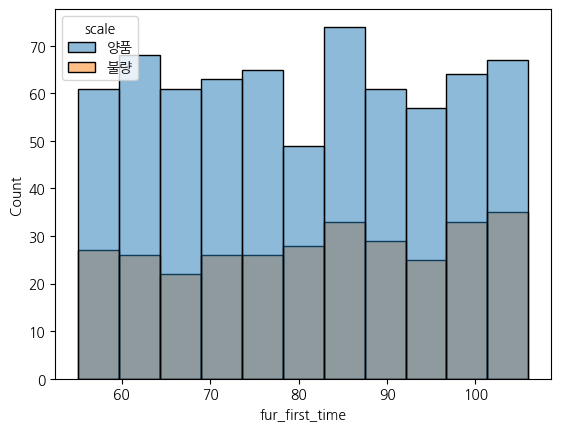

In [5]:
sns.histplot(x='fur_first_time',hue = 'scale',data=df)

In [4]:
df.drop(df[df["hsb"] == "미적용"].index, inplace=True)

df.drop(["pt_thick","pt_length","pt_width" , 'plate_no' , 'rolling_date', 'spec_long' ,'spec_country' ,'fur_no','fur_input_row','fur_total_time'],axis = 1, inplace = True)


In [6]:
df0 = df[df['scale']=="양품"]
df1 = df[df['scale']=="불량"]
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         690 non-null    object
 1   rolling_date     690 non-null    object
 2   scale            690 non-null    object
 3   spec_long        690 non-null    object
 4   spec_country     690 non-null    object
 5   steel_kind       690 non-null    object
 6   hsb              690 non-null    object
 7   fur_no           690 non-null    object
 8   fur_input_row    690 non-null    object
 9   fur_heat_temp    690 non-null    int64 
 10  fur_heat_time    690 non-null    int64 
 11  fur_soak_temp    690 non-null    int64 
 12  fur_soak_time    690 non-null    int64 
 13  fur_total_time   690 non-null    int64 
 14  rolling_method   690 non-null    object
 15  rolling_temp     690 non-null    int64 
 16  descaling_count  690 non-null    int64 
 17  work_group       690 non-null    ob

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            953 non-null    object
 1   steel_kind       953 non-null    object
 2   hsb              953 non-null    object
 3   fur_heat_temp    953 non-null    int64 
 4   fur_heat_time    953 non-null    int64 
 5   fur_soak_temp    953 non-null    int64 
 6   fur_soak_time    953 non-null    int64 
 7   rolling_method   953 non-null    object
 8   rolling_temp     953 non-null    int64 
 9   descaling_count  953 non-null    int64 
 10  work_group       953 non-null    object
dtypes: int64(6), object(5)
memory usage: 89.3+ KB


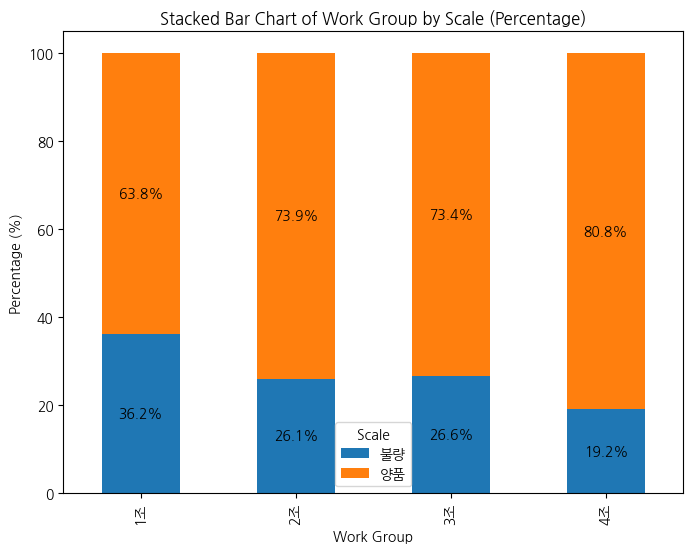

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# work_group별로 scale 값의 빈도를 계산하여 피벗 테이블 생성
data = df.groupby(['work_group', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("Stacked Bar Chart of Work Group by Scale (Percentage)")
plt.xlabel("Work Group")
plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()


1조와 4조의 비율 차이가 많이 나므로 (15%p) 개선교육이 필요함 scale과 작업자 영향을 준다.

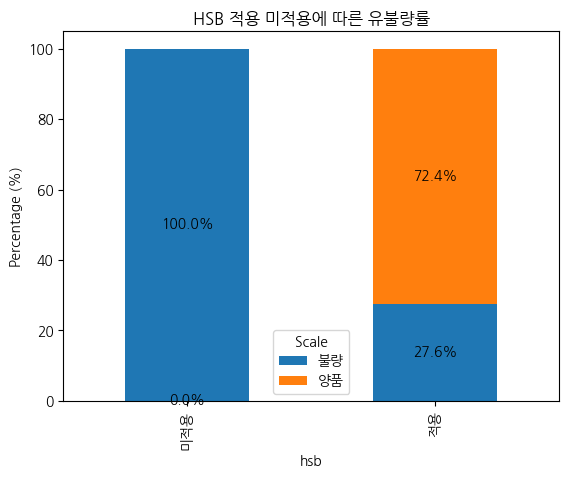

In [127]:

import pandas as pd
import matplotlib.pyplot as plt

# work_group별로 scale 값의 빈도를 계산하여 피벗 테이블 생성
data = df.groupby(['hsb', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True)

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("HSB 적용 미적용에 따른 유불량률")

plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()

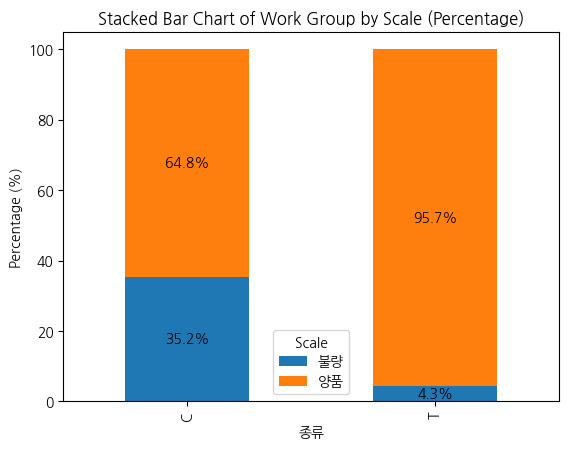

In [41]:
data = df.groupby(['steel_kind', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True)

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("Stacked Bar Chart of Work Group by Scale (Percentage)")
plt.xlabel("종류")
plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()

(hsb가 적용되어) 강종의 종류가 탄소일때, 불량률이 높다. 


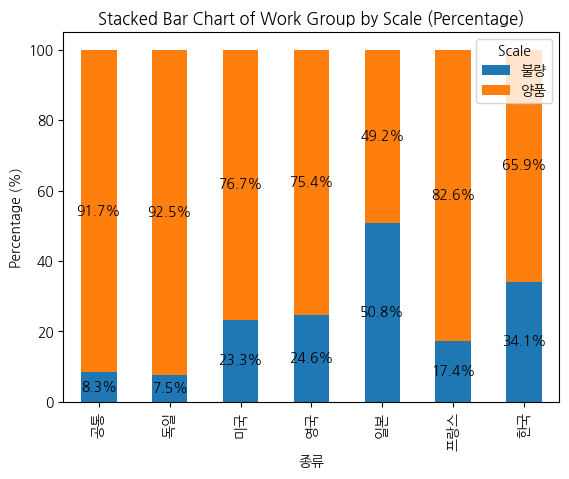

In [49]:
data = df.groupby(['spec_country', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True)

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("Stacked Bar Chart of Work Group by Scale (Percentage)")
plt.xlabel("종류")
plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()

독일에 수출하는 스틸의 불량률은 낮고, 일본에 수출하는 스틸 불량률이 높다.
-> 개선사항: 없어보임 (일본이 탄소강을 많이 수입하므로 불량률이 높은것으로 보임)
(독일은 경우, 티타늄강을 수입하므로, 불량률이 낮은것으로 보임)

일본은 티타늄을 고품질 생산 가능하여 탄소강을 주로 수입하기때문에 불량률이 높아 보이는것으로 해석할수있다.

Text(0.5, 1.0, 'pt_thick')

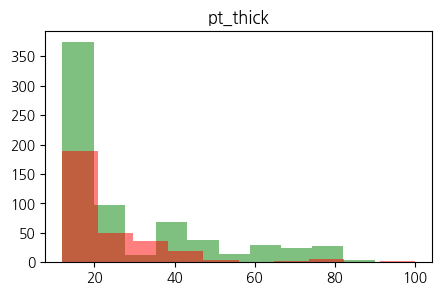

In [76]:
df_raw = pd.read_csv('SCALE불량.csv', encoding='euc-kr')
df_raw['scale'] = np.where(df_raw['scale']=='양품',0,1)

# scale 값이 0인 데이터와 1인 데이터 분리
df0 = df_raw[df_raw['scale'] == 0]
df1 = df_raw[df_raw['scale'] == 1]

# 히스토그램 그리기
plt.figure(figsize=(5, 3))
plt.hist(df0['pt_thick'],alpha=0.5,color='green')
plt.hist(df1['pt_thick'],alpha=0.5,color='red')
plt.title('pt_thick')


두께가 얇을수록 scale 발생 확률이 올라간다.

Text(0.5, 1.0, 'rolling_temp')

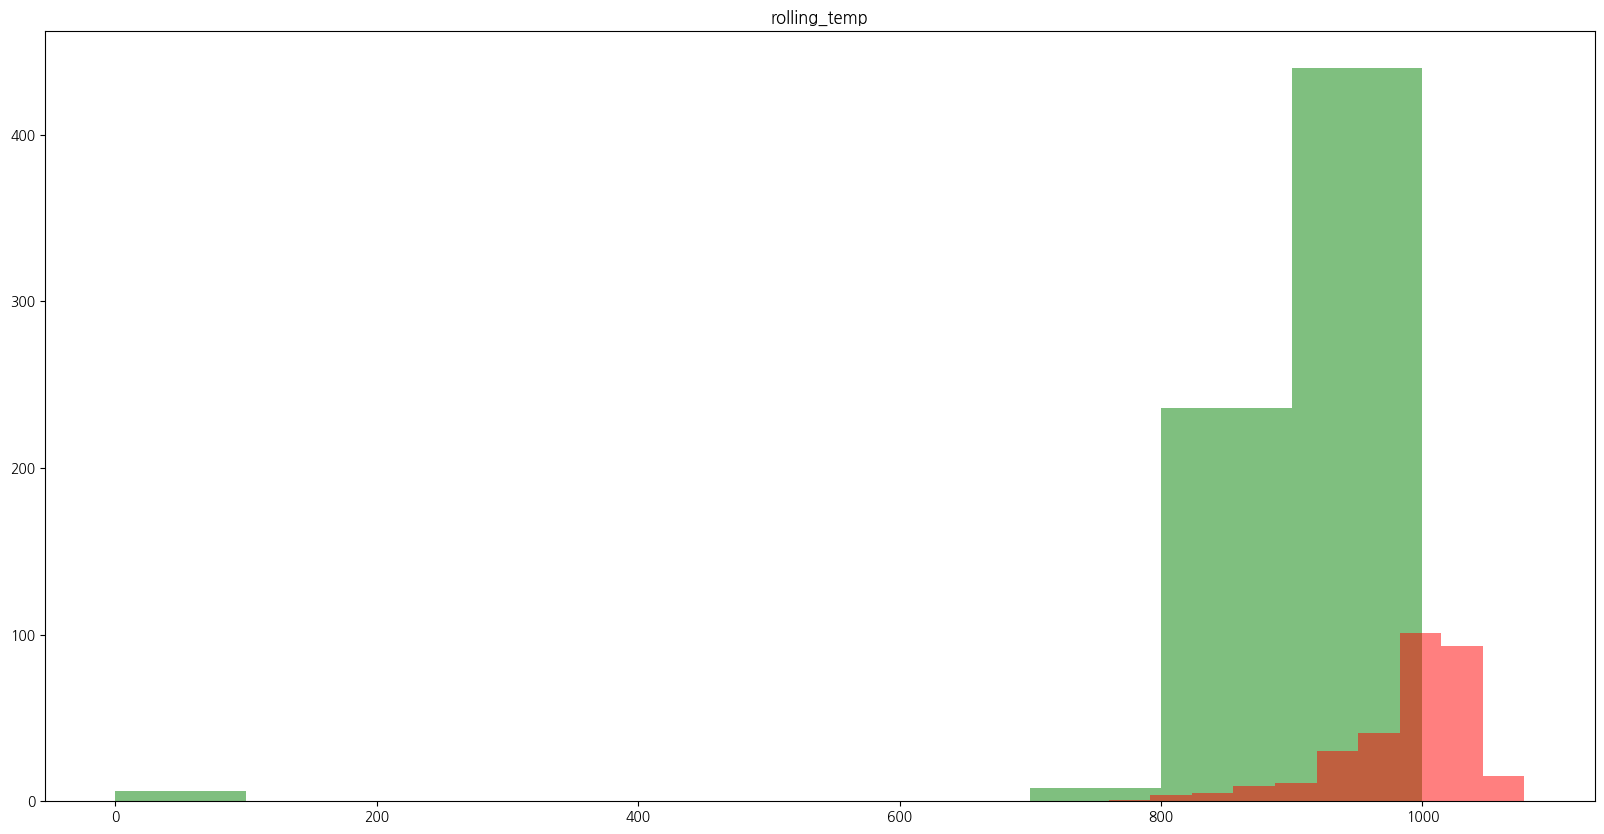

In [77]:
plt.figure(figsize=(20, 10))
plt.hist(df0['rolling_temp'],alpha=0.5,color='green')
plt.hist(df1['rolling_temp'],alpha=0.5,color='red')
plt.title('rolling_temp')

1000도 이상이면 100% 불량

Text(0.5, 1.0, 'pt_width')

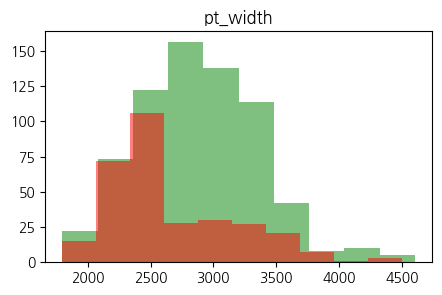

In [78]:
plt.figure(figsize=(5, 3))
plt.hist(df0['pt_width'],alpha=0.5,color='green')
plt.hist(df1['pt_width'],alpha=0.5,color='red')
plt.title('pt_width')

Text(0.5, 1.0, 'pt_length')

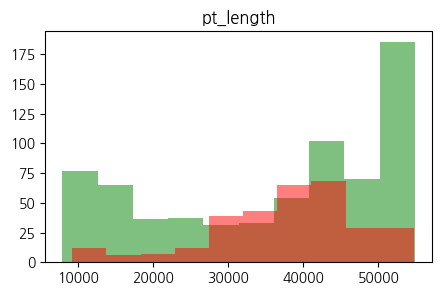

In [79]:
plt.figure(figsize=(5, 3))
plt.hist(df0['pt_length'],alpha=0.5,color='green')
plt.hist(df1['pt_length'],alpha=0.5,color='red')
plt.title('pt_length')

Text(0.5, 1.0, 'fur_total_time')

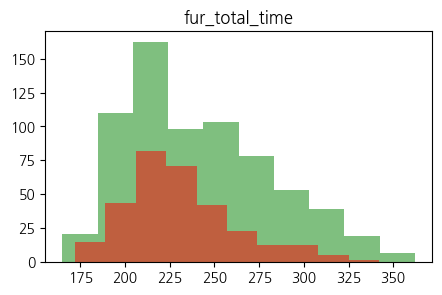

In [80]:
plt.figure(figsize=(5, 3))
plt.hist(df0['fur_total_time'],alpha=0.5,color='green')
plt.hist(df1['fur_total_time'],alpha=0.5,color='red')
plt.title('fur_total_time')

Text(0.5, 1.0, 'fur_heat_temp')

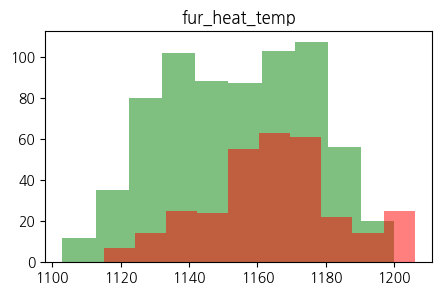

In [81]:
plt.figure(figsize=(5, 3))
plt.hist(df0['fur_heat_temp'],alpha=0.5,color='green')
plt.hist(df1['fur_heat_temp'],alpha=0.5,color='red')
plt.title('fur_heat_temp')

Text(0.5, 1.0, 'fur_heat_time')

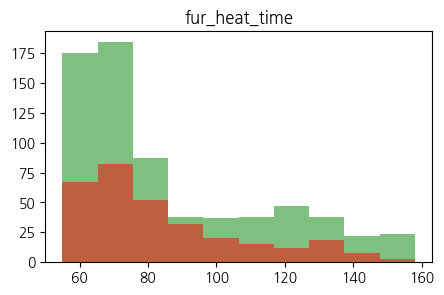

In [82]:
plt.figure(figsize=(5, 3))
plt.hist(df0['fur_heat_time'],alpha=0.5,color='green')
plt.hist(df1['fur_heat_time'],alpha=0.5,color='red')
plt.title('fur_heat_time')

Text(0.5, 1.0, 'fur_soak_temp')

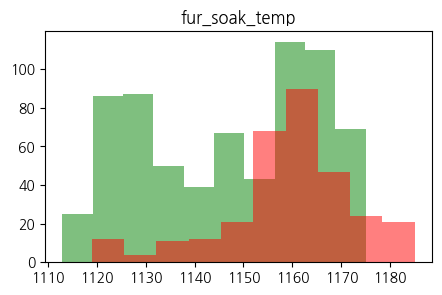

In [83]:
plt.figure(figsize=(5, 3))
plt.hist(df0['fur_soak_temp'],alpha=0.5,color='green')
plt.hist(df1['fur_soak_temp'],alpha=0.5,color='red')
plt.title('fur_soak_temp')

Text(0.5, 1.0, 'fur_soak_time')

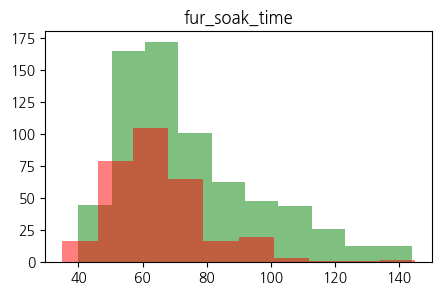

In [84]:
plt.figure(figsize=(5, 3))
plt.hist(df0['fur_soak_time'],alpha=0.5,color='green')
plt.hist(df1['fur_soak_time'],alpha=0.5,color='red')
plt.title('fur_soak_time')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         953 non-null    object
 1   rolling_date     953 non-null    object
 2   scale            953 non-null    object
 3   spec_long        953 non-null    object
 4   spec_country     953 non-null    object
 5   steel_kind       953 non-null    object
 6   hsb              953 non-null    object
 7   fur_no           953 non-null    object
 8   fur_input_row    953 non-null    object
 9   fur_heat_temp    953 non-null    int64 
 10  fur_heat_time    953 non-null    int64 
 11  fur_soak_temp    953 non-null    int64 
 12  fur_soak_time    953 non-null    int64 
 13  fur_total_time   953 non-null    int64 
 14  rolling_method   953 non-null    object
 15  rolling_temp     953 non-null    int64 
 16  descaling_count  953 non-null    int64 
 17  work_group       953 non-null    ob

In [17]:
scale_fur_no = pd.crosstab(df['scale'],df['fur_no'])
scale_fur_no

stats , p , dof , expected = chi2_contingency(scale_fur_no)
print(stats,p)

# 고로의 호기가 불량에 영향을 주는지 보기위해 카이제곱 독립성 검정을 시행한 결과 
# pval 0.45로 독립이라는 귀무가설에 영향을 못줘 고로가 SCALE 불량에 영향을 준다고
# 보기어렵다.

1.5783415322367476 0.4542212948451264


In [20]:
scale_spec = pd.crosstab(df['scale'],df['spec_long'])
stats , p , dof , expected = chi2_contingency(scale_spec)
print(stats , p)

# 제품 규격과 scale도 서로 독립이 아닌것이 pval을 보면 알수있으며 따라서 제품규격에따라
# scale 이 영향을 받는다는것을 알수있다.

265.9447996622182 4.465280769463999e-27


rolling_method  CR(제어압연)  TMCP(온도제어)
scale                               
불량                   256           7
양품                   543         147
서로 종속임으로 scale에 영향을 주는 요인이다.


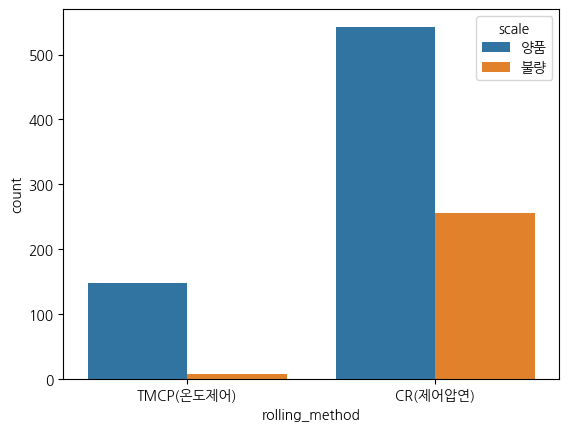

In [23]:
sns.countplot(x='rolling_method', hue = 'scale' ,data = df)

scale_method = pd.crosstab(df['scale'],df['rolling_method'])
print(scale_method)

stats , p , dof , expected = chi2_contingency(scale_method)

if p > 0.05:
    print('서로 독립임으로 scale에 영향을 주는 요인이 아니다.')
else:
    print('서로 종속임으로 scale에 영향을 주는 요인이다.')
    
# 압연 방식에따라 불량률의 차이가 크고 카이제곱 검정을 통해 독립성 검정을 해본결과
# 서로 종속임으로 scale에 rolling_method 영향을 준다.

In [10]:
time = df['rolling_date'].str.split(':')

rolling_time =[]

for t in time:
    rolling_time.append(int(t[1]))

df['time'] = rolling_time

서로 종속임으로 scale에 영향을 주는 요인이다.


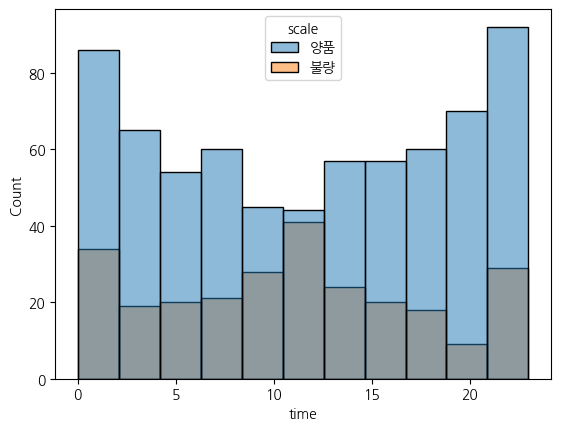

In [30]:
sns.histplot(x='time',hue='scale',data=df)
scale_time = pd.crosstab(df['scale'],df['time'])

stats , p , dof , expected = chi2_contingency(scale_time)

if p > 0.05:
    print('서로 독립임으로 scale에 영향을 주는 요인이 아니다.')
else:
    print('서로 종속임으로 scale에 영향을 주는 요인이다.')
    
# 시간대별로 scale 불량에 영향을 주는게 뚜렷하게 보이나 특정시간대에 작업을 중단할수
# 없으며 개선안으로는 그시간대에 조사를하여 원인을 찾는것이 중요해보인다.

서로 독립임으로 scale에 영향을 주는 요인이 아니다.


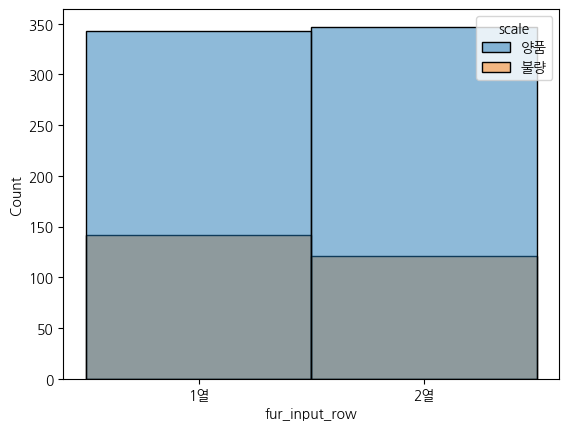

In [32]:
sns.histplot(x='fur_input_row',hue='scale',data = df)

scale_input = pd.crosstab(df['scale'],df['fur_input_row'])

stats , p , dof , expected = chi2_contingency(scale_input)

if p > 0.05:
    print('서로 독립임으로 scale에 영향을 주는 요인이 아니다.')
else:
    print('서로 종속임으로 scale에 영향을 주는 요인이다.')
    
# 가열로로 들어가는 열수가 scale에 영향을 주지 못함.

서로 종속임으로 scale에 영향을 주는 요인이다.


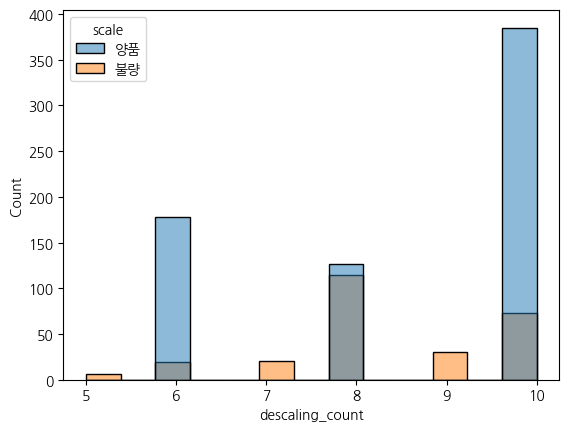

In [36]:
sns.histplot(x='descaling_count',hue='scale',data=df)

scale_descaling = pd.crosstab(df['scale'],df['descaling_count'])

stats , p , dof , expected = chi2_contingency(scale_descaling)

if p > 0.05:
    print('서로 독립임으로 scale에 영향을 주는 요인이 아니다.')
else:
    print('서로 종속임으로 scale에 영향을 주는 요인이다.')
    
# 카이제곱 검정결과 scale에 압연횟수가 영향을 주며 , 시각화를 해본 결과 5,7,9 는 
# 작업공정에서 빠져야 할듯 싶고 , 8번 을 하는 과정은 불량률이 거의 50%에 육박함으로
# 제거하는 것이 좋겠으나 압연횟수에따라 만들어지는 제품이 다르다면 개선안을 고민
# 해봐야할거같다.

In [11]:
# scale에 영향을 주지않는 plate.no , date , fur_no , input_row 
df_work = df.drop(columns=['plate_no','rolling_date','fur_no','fur_input_row'],axis=1)

In [8]:
df_work['scale'].value_counts()

양품    690
불량    263
Name: scale, dtype: int64

In [6]:
df_work = df.reset_index(drop=True)

In [9]:
df_work['scale'] = np.where(df_work['scale'] == '양품', 0 ,1)
df_work = df_work[df_work['rolling_temp'] != 0 ]

In [10]:
df_work['scale'].value_counts()

0    684
1    263
Name: scale, dtype: int64

In [17]:
df_work.head()

,scale,spec_long,spec_country,steel_kind,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,time
0,0,AB/EH32-TM,미국,T,적용,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,7
1,0,AB/EH32-TM,미국,T,적용,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,7
2,0,NV-E36-TM,영국,T,적용,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,7
3,0,NV-E36-TM,영국,T,적용,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,7
4,0,BV-EH36-TM,프랑스,T,적용,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,7


In [11]:
df_work['descaling_count'] =df_work['descaling_count'].astype(str)
# df_work['time'] = df_work['time'].astype(str)

# rolling temp의 이상치가 모든경우가 양품임으로 우리가 발견하고자하는 scale 불량과 관련이 없다고 생각하여 삭제함 
# df_work = df_work[df_work['rolling_temp'] != 0]

In [12]:
# 강종별 데이터 분리
df_work_c = df_work[df_work['steel_kind'] == 'C' ]
df_work_t = df_work[df_work['steel_kind'] == 'T' ]
df_work_c = df_work_c.reset_index(drop=True)
df_work_t = df_work_t.reset_index(drop=True)

In [13]:
# 탄소 강종 데이터 분리
df_c_dummy = pd.get_dummies(df_work_c)
df_x_c = df_c_dummy.iloc[:,1:]
df_y_c = df_c_dummy.iloc[:,0]
c_idx = [i for i in range(len(df_work_c))]
tr_c_idx , te_c_idx = train_test_split(c_idx,test_size=.3 , random_state=2024 , shuffle = True)
tr_x = df_x_c.loc[tr_c_idx] ; te_x = df_x_c.loc[te_c_idx]
tr_y = df_y_c.loc[tr_c_idx] ; te_y = df_x_c.loc[te_c_idx]


In [14]:
# 탄소 데이터만 랜포 grid search
rf_model = RandomForestClassifier(random_state=2024)
est = [30,50,100] ; leaf = [18 , 30 , 50] ; split = [20 , 40 , 60 ] ; depth = [3,5,7]
params = {'n_estimators': est , 'min_samples_leaf' : leaf , 'min_samples_split' : split ,'max_depth': depth }

rf_grid = GridSearchCV(rf_model,params,scoring='r2',n_jobs=-1)
rf_grid_model = rf_grid.fit(tr_x,tr_y)
print(rf_grid.best_estimator_)

RandomForestClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       n_estimators=50, random_state=2024)


([<matplotlib.axis.YTick at 0x7f185dd54cd0>,
 [Text(0, 0, 'steel_kind_C'),
  Text(0, 1, 'hsb_적용'),
  Text(0, 2, 'rolling_method_CR(제어압연)'),
  Text(0, 3, 'descaling_count_6'),
  Text(0, 4, 'descaling_count_7'),
  Text(0, 5, 'work_group_3조'),
  Text(0, 6, 'work_group_2조'),
  Text(0, 7, 'descaling_count_9'),
  Text(0, 8, 'work_group_1조'),
  Text(0, 9, 'work_group_4조'),
  Text(0, 10, 'fur_soak_time'),
  Text(0, 11, 'fur_heat_time'),
  Text(0, 12, 'descaling_count_8'),
  Text(0, 13, 'fur_heat_temp'),
  Text(0, 14, 'fur_soak_temp'),
  Text(0, 15, 'descaling_count_10'),
  Text(0, 16, 'rolling_temp')])

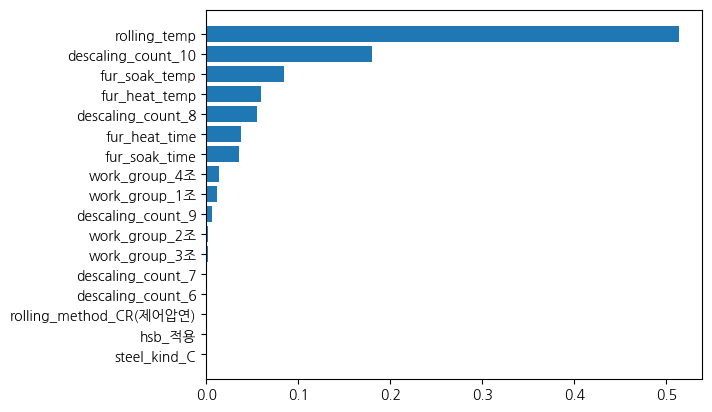

In [16]:
rf_c_model = RandomForestClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       n_estimators=50, random_state=2024).fit(tr_x,tr_y)

c_df = pd.DataFrame()
c_df['feature'] = tr_x.columns
c_df['imp'] = rf_c_model.feature_importances_
c_df.sort_values('imp',ascending=True,inplace=True)

c_label = [i for i in range(len(tr_x.columns))]
plt.barh(y = c_label , width= c_df['imp'] )
plt.yticks(c_label,c_df['feature'])
# rolling_temp , des 10 ,des 8 ,soak time , soak temp , heat temp , heat time , total time , 규격 ,나라
# 작업조

In [21]:
df_work_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            716 non-null    int64 
 1   steel_kind       716 non-null    object
 2   hsb              716 non-null    object
 3   fur_heat_temp    716 non-null    int64 
 4   fur_heat_time    716 non-null    int64 
 5   fur_soak_temp    716 non-null    int64 
 6   fur_soak_time    716 non-null    int64 
 7   rolling_method   716 non-null    object
 8   rolling_temp     716 non-null    int64 
 9   descaling_count  716 non-null    object
 10  work_group       716 non-null    object
dtypes: int64(6), object(5)
memory usage: 61.7+ KB


In [17]:
df_work_cc = df_work_c.iloc[:,[0,3,4,5,6,8,9,10]]

df_dummy = pd.get_dummies(df_work_cc)
df_x = df_dummy.iloc[:,1:]
df_y = df_dummy.iloc[:,0]

idx = [i for i in range(len(df_work_cc))]
train_idx , test_idx = train_test_split(idx , test_size=0.3 , shuffle = True , random_state=2024)
tr_x = df_x.loc[train_idx] ; te_x = df_x.loc[test_idx]
tr_y = df_y.loc[train_idx] ; te_y = df_y.loc[test_idx]

dt_model =DecisionTreeClassifier(random_state=2024)
leaf = [18 , 30 , 50] ; split = [20 , 40 , 60 ] ; depth = [3,5,7]
params = {'min_samples_leaf' : leaf , 'min_samples_split' : split ,'max_depth': depth }

dt_grid = GridSearchCV(dt_model,params,scoring='r2',n_jobs=-1)
rf_grid_model = dt_grid.fit(tr_x,tr_y)
print(rf_grid_model.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       random_state=2024)


1.0
[[143   0]
 [  0  72]]


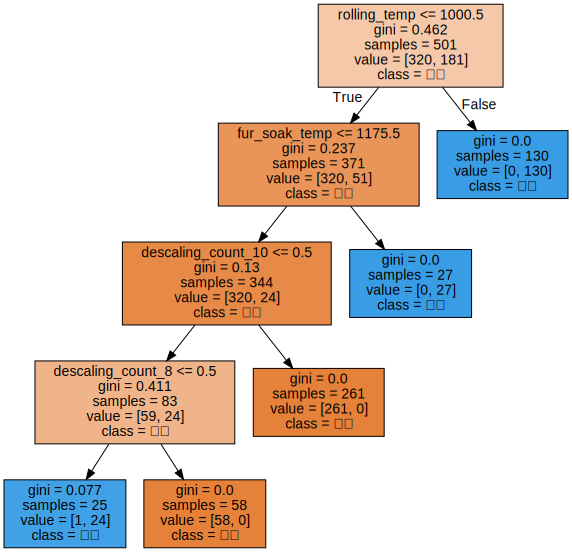

In [18]:
# 탄소 불양품 DT 모델및 시각화
dt_c_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       random_state=2024).fit(tr_x,tr_y)
dt_c_pred = dt_c_model.predict(te_x)
print(accuracy_score(te_y,dt_c_pred))
print(confusion_matrix(te_y,dt_c_pred))

c_viz = export_graphviz(dt_c_model , feature_names=tr_x.columns ,class_names=['양품','불량'] ,impurity=True , filled=True)
graphviz.Source(c_viz)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')


In [20]:
# 티타늄 강종 만 사용해서 DT
df_t_dummy = pd.get_dummies(df_work_t)
df_x_t = df_t_dummy.iloc[:,1:]
df_y_t = df_t_dummy.iloc[:,0]


t_idx = [i for i in range(len(df_work_t))]
tr_t_idx , te_t_idx = train_test_split(t_idx,test_size=.3 , random_state=2024 , shuffle = True)
tr_x = df_x_t.loc[tr_t_idx] ; te_x = df_x_t.loc[te_t_idx]
tr_y = df_y_t.loc[tr_t_idx] ; te_y = df_x_t.loc[te_t_idx]

rf_model = RandomForestClassifier(random_state=2024)
est = [30,50,100] ; leaf = [18 , 30 , 50] ; split = [20 , 40 , 60 ] ; depth = [3,5,7]
params = {'n_estimators': est , 'min_samples_leaf' : leaf , 'min_samples_split' : split ,'max_depth': depth }

rf_grid = GridSearchCV(rf_model,params,scoring='r2',n_jobs=-1)
rf_grid_model = rf_grid.fit(tr_x,tr_y)
print(rf_grid_model.best_estimator_)

RandomForestClassifier(max_depth=3, min_samples_leaf=18, min_samples_split=20,
                       n_estimators=30, random_state=2024)


([<matplotlib.axis.YTick at 0x7f185da2a500>,
 [Text(0, 0, 'descaling_count_9'),
  Text(0, 1, 'descaling_count_8'),
  Text(0, 2, 'steel_kind_T'),
  Text(0, 3, 'hsb_적용'),
  Text(0, 4, 'rolling_method_CR(제어압연)'),
  Text(0, 5, 'descaling_count_10'),
  Text(0, 6, 'descaling_count_5'),
  Text(0, 7, 'descaling_count_7'),
  Text(0, 8, 'work_group_1조'),
  Text(0, 9, 'rolling_method_TMCP(온도제어)'),
  Text(0, 10, 'work_group_2조'),
  Text(0, 11, 'rolling_temp'),
  Text(0, 12, 'work_group_3조'),
  Text(0, 13, 'fur_heat_temp'),
  Text(0, 14, 'fur_soak_temp'),
  Text(0, 15, 'descaling_count_6'),
  Text(0, 16, 'fur_heat_time'),
  Text(0, 17, 'fur_soak_time')])

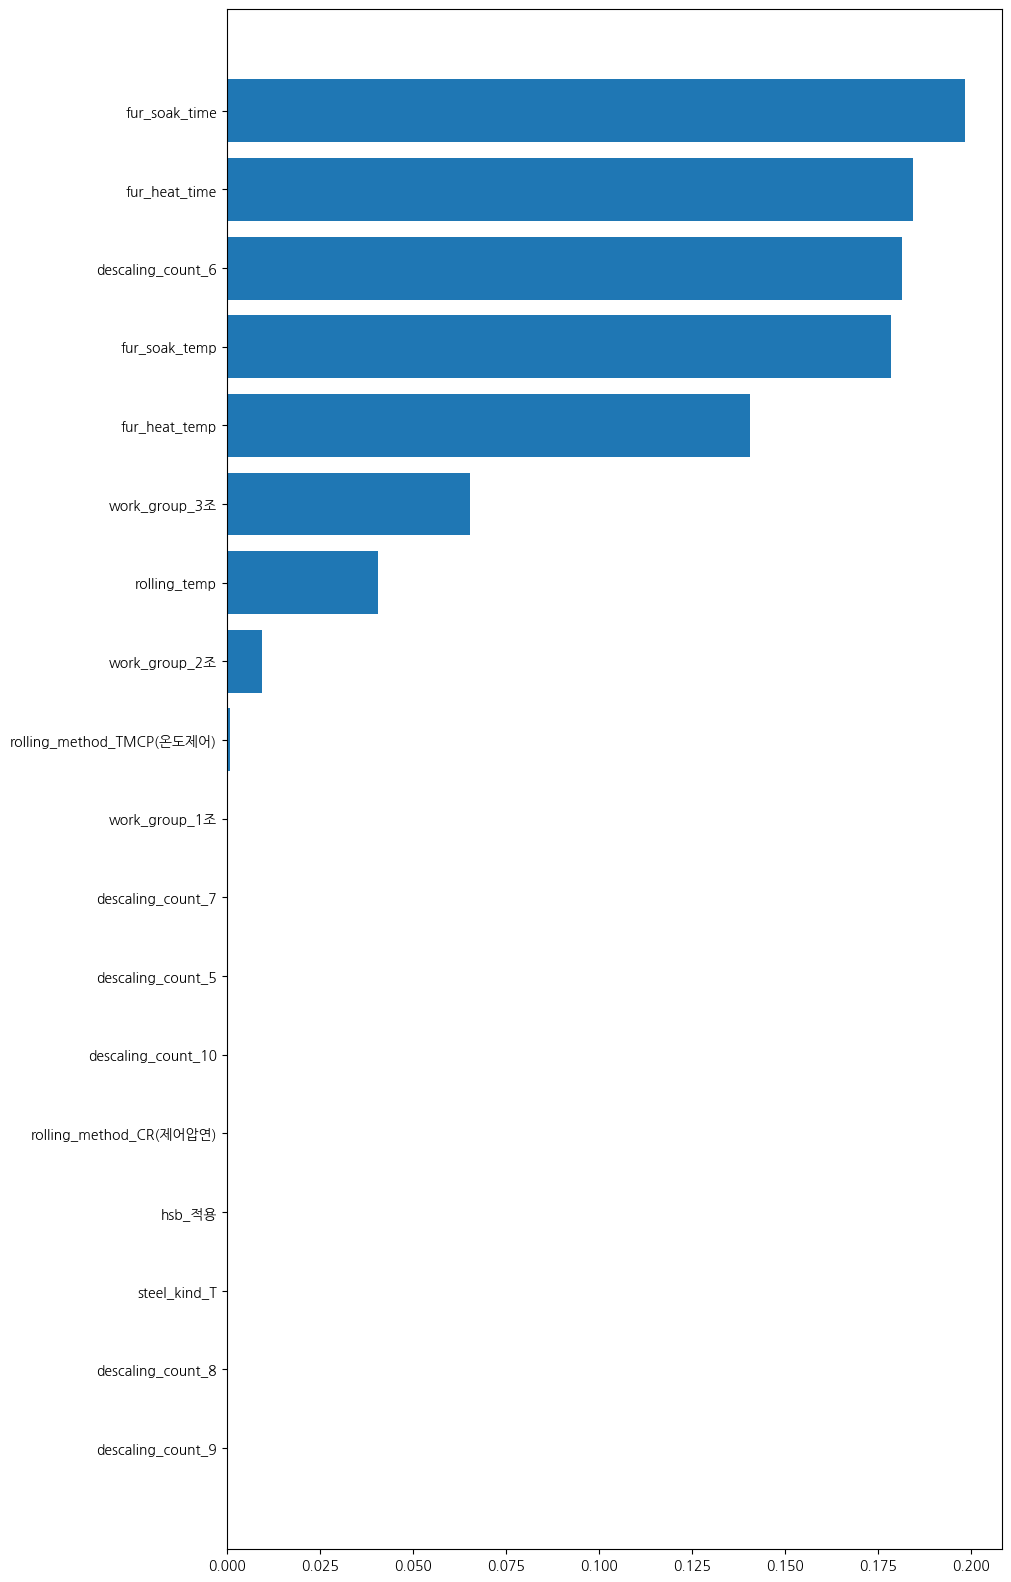

In [21]:
rf_t_model = RandomForestClassifier(max_depth=3, min_samples_leaf=18, min_samples_split=20,
                       n_estimators=30, random_state=2024).fit(tr_x,tr_y)

t_df = pd.DataFrame()
t_df['feature'] = tr_x.columns
t_df['imp'] = rf_t_model.feature_importances_
t_df.sort_values('imp',ascending=True,inplace=True)
t_label = [i for i in range(len(tr_x.columns))]
plt.figure(figsize=(10,20))
plt.barh(y = t_label , width= t_df['imp'] )
plt.yticks(t_label,t_df['feature'])


# soak 시간 온도 / heat 시간 온도 / rolling temp / 작업조 / total time / method / country

In [23]:
df_work_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            231 non-null    int64 
 1   steel_kind       231 non-null    object
 2   hsb              231 non-null    object
 3   fur_heat_temp    231 non-null    int64 
 4   fur_heat_time    231 non-null    int64 
 5   fur_soak_temp    231 non-null    int64 
 6   fur_soak_time    231 non-null    int64 
 7   rolling_method   231 non-null    object
 8   rolling_temp     231 non-null    int64 
 9   descaling_count  231 non-null    object
 10  work_group       231 non-null    object
dtypes: int64(6), object(5)
memory usage: 20.0+ KB


In [24]:
# soak 시간 온도 / heat 시간 온도 / rolling temp / 작업조 / total time / method / country
df_work_tt = df_work_t.iloc[:,[0,3,4,5,6,7,8,9,10]]

df_dummy = pd.get_dummies(df_work_tt)
df_x = df_dummy.iloc[:,1:]
df_y = df_dummy.iloc[:,0]


idx = [i for i in range(len(df_x))]
train_idx , test_idx = train_test_split(idx , test_size=0.3 , shuffle = True , random_state=2024)
tr_x = df_x.loc[train_idx] ; te_x = df_x.loc[test_idx]
tr_y = df_y.loc[train_idx] ; te_y = df_y.loc[test_idx]

dt_model =DecisionTreeClassifier(random_state=2024)
leaf = [5,10,18] ; split = [10,20,36 ] ; depth = [3,5,7]
params = {'min_samples_leaf' : leaf , 'min_samples_split' : split ,'max_depth': depth }

dt_grid = GridSearchCV(dt_model,params,scoring='accuracy',n_jobs=-1)
rf_grid_model = dt_grid.fit(tr_x,tr_y)
print(rf_grid_model.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=2024)


0.8857142857142857
0.0
[[62  0]
 [ 8  0]]


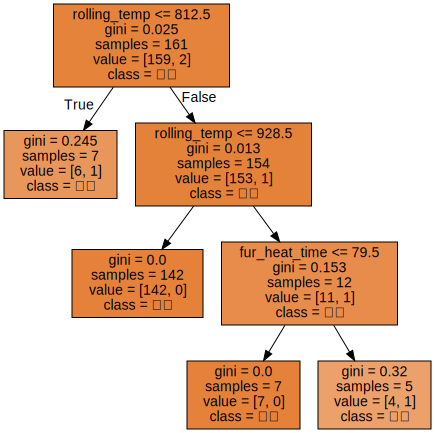

In [25]:
# SMOTE 전
dt_t_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=2024).fit(tr_x,tr_y)
dt_t_pred = dt_t_model.predict(te_x)
print(accuracy_score(te_y,dt_t_pred))
print(f1_score(te_y,dt_t_pred))
print(confusion_matrix(te_y,dt_t_pred))

t_viz = export_graphviz(dt_t_model , feature_names=tr_x.columns ,class_names=['양품','불량'] ,impurity=True , filled=True)
graphviz.Source(t_viz)

In [26]:
# soak 시간 온도 / heat 시간 온도 / rolling temp / 작업조 / total time / method / country
df_work_tt = df_work_t.iloc[:,[0,3,4,5,6,7,8,9,10]]

df_dummy = pd.get_dummies(df_work_tt)
df_x = df_dummy.iloc[:,1:]
df_y = df_dummy.iloc[:,0]

df_x_re , df_y_re = smote.fit_resample(df_x,df_y)
idx = [i for i in range(len(df_x_re))]
train_idx , test_idx = train_test_split(idx , test_size=0.3 , shuffle = True , random_state=2024)
tr_x = df_x_re.loc[train_idx] ; te_x = df_x_re.loc[test_idx]
tr_y = df_y_re.loc[train_idx] ; te_y = df_y_re.loc[test_idx]

dt_model =DecisionTreeClassifier(random_state=2024)
leaf = [10,18] ; split = [20,36 ] ; depth = [3,5]
params = {'min_samples_leaf' : leaf , 'min_samples_split' : split ,'max_depth': depth }

dt_grid = GridSearchCV(dt_model,params,scoring='accuracy',n_jobs=-1)
rf_grid_model = dt_grid.fit(tr_x,tr_y)
print(rf_grid_model.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                       random_state=2024)


0.9849624060150376
0.9855072463768116
[[63  1]
 [ 1 68]]


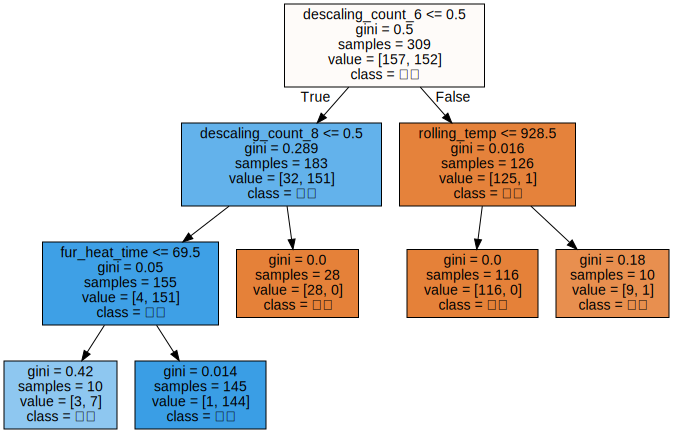

In [27]:
# dt_t_model SMOTE 후
dt_t_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                       random_state=2024).fit(tr_x,tr_y)
dt_t_pred = dt_t_model.predict(te_x)
print(accuracy_score(te_y,dt_t_pred))
print(f1_score(te_y,dt_t_pred))
print(confusion_matrix(te_y,dt_t_pred))

t_viz = export_graphviz(dt_t_model , feature_names=tr_x.columns ,class_names=['양품','불량'] ,impurity=True , filled=True)
graphviz.Source(t_viz)

In [28]:
df_work = df_work.reset_index(drop=True)

In [29]:
# 전체 데이터중 데이터 분리
df_dummy = pd.get_dummies(df_work)
df_x = df_dummy.iloc[:,1:]
df_y = df_dummy.iloc[:,0]

idx = [i for i in range(len(df_work))]
train_idx , test_idx = train_test_split(idx , test_size=0.3 , shuffle = True , random_state=2024)
tr_x = df_x.loc[train_idx] ; te_x = df_x.loc[test_idx]
tr_y = df_y.loc[train_idx] ; te_y = df_y.loc[test_idx]

In [30]:
# 랜덤포레스트를 통한 중요 변수 선정

rf_model = RandomForestClassifier(random_state=2024)
est = [30,50,100] ; leaf = [18 , 30 , 50] ; split = [20 , 40 , 60 ] ; depth = [3,5,7]
params = {'n_estimators': est , 'min_samples_leaf' : leaf , 'min_samples_split' : split ,'max_depth': depth }

rf_grid = GridSearchCV(rf_model,params,scoring='r2',n_jobs=-1)
rf_grid_model = rf_grid.fit(tr_x,tr_y)

In [31]:
print(rf_grid_model.best_estimator_)

RandomForestClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       n_estimators=50, random_state=2024)


Text(0.5, 0, '중요도')

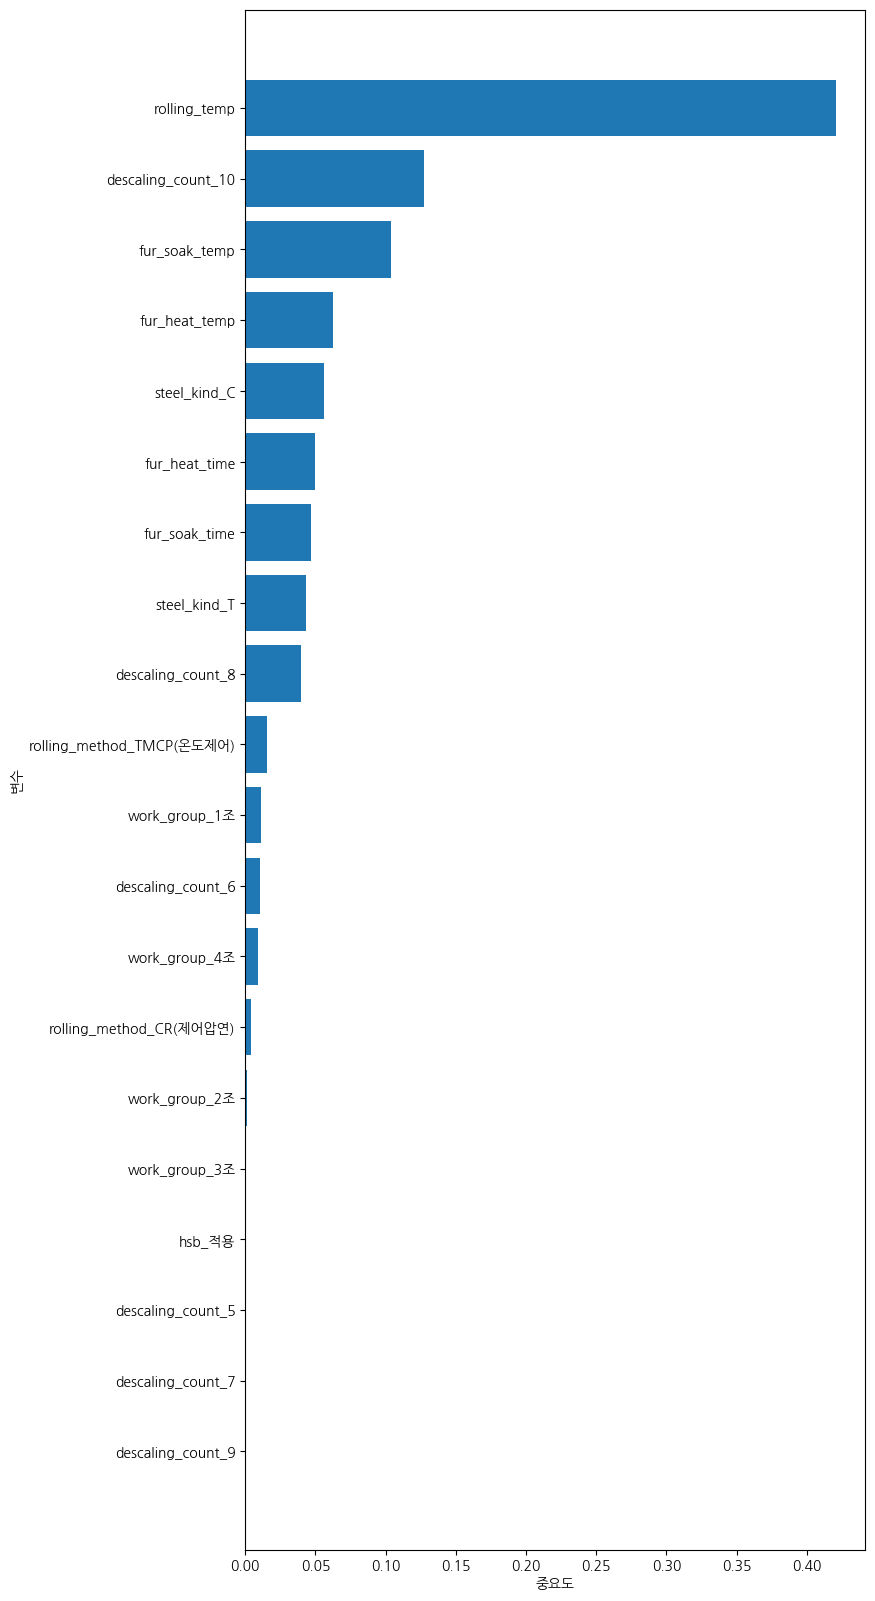

In [33]:
rf_model = RandomForestClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       n_estimators=50, random_state=2024).fit(tr_x,tr_y)

rf_imp = pd.DataFrame()
rf_imp['feature'] = tr_x.columns
rf_imp['imp'] = rf_model.feature_importances_
rf_imp.sort_values('imp',ascending=True , inplace = True)

labels = [ i for i in range(len(tr_x.columns))]
plt.figure(figsize=(8,20))
plt.barh(y=labels , width = rf_imp['imp'])
plt.yticks(labels , rf_imp['feature'])
plt.ylabel('변수')
plt.xlabel('중요도')

# 압연온도 , 압연 descaling , 균열대 온도 , 가열대 온도 , 강종 c , 가열시간 순 으로 중요

In [57]:
rf_imp[rf_imp['imp']>0]

# spec_long , spec_country , descaling , work_group , rolling_method 
# steel_kind , fur_heat_time , fur_total_time , fur_soak_time
# rolling_temp

,feature,imp
36,spec_long_JS-SM490YB,9.152007e-07
20,spec_long_BV-B,7.631315e-05
92,time_1,1.651290e-04
9,spec_long_AB/A,9.687808e-04
48,spec_long_LR-AH32,1.123330e-03
22,spec_long_BV-EH36-TM,1.633436e-03
71,spec_country_미국,1.634021e-03
47,spec_long_LR-A,2.141403e-03
70,spec_country_독일,2.381735e-03
72,spec_country_영국,2.432837e-03


In [34]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            947 non-null    int64 
 1   steel_kind       947 non-null    object
 2   hsb              947 non-null    object
 3   fur_heat_temp    947 non-null    int64 
 4   fur_heat_time    947 non-null    int64 
 5   fur_soak_temp    947 non-null    int64 
 6   fur_soak_time    947 non-null    int64 
 7   rolling_method   947 non-null    object
 8   rolling_temp     947 non-null    int64 
 9   descaling_count  947 non-null    object
 10  work_group       947 non-null    object
dtypes: int64(6), object(5)
memory usage: 81.5+ KB


In [35]:
# spec_long , spec_country , descaling , work_group , rolling_method 
# steel_kind , fur_heat_time , fur_total_time , fur_soak_time
# rolling_temp

df_tree = df_work.iloc[:,[0,1,3,4,5,6,7,8,9,10]]

In [36]:
df_tree = df_tree.reset_index(drop=True)

In [37]:
df_tree_dum = pd.get_dummies(df_tree)
df_x = df_tree_dum.iloc[:,1:]
df_y = df_tree_dum.iloc[:,0]

idx = [i for i in range(len(df_tree))]
train_idx , test_idx = train_test_split(idx , test_size=0.2 , shuffle = True , random_state=2024)
tr_x = df_x.loc[train_idx] ; te_x = df_x.loc[test_idx]
tr_y = df_y.loc[train_idx] ; te_y = df_y.loc[test_idx]

In [38]:
dt_model =DecisionTreeClassifier(random_state=2024)
leaf = [18 , 30 , 50] ; split = [20 , 40 , 60 ] ; depth = [3,5,7]
params = {'min_samples_leaf' : leaf , 'min_samples_split' : split ,'max_depth': depth }

dt_grid = GridSearchCV(dt_model,params,scoring='r2',n_jobs=-1)
rf_grid_model = dt_grid.fit(tr_x,tr_y)
print(rf_grid_model.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       random_state=2024)


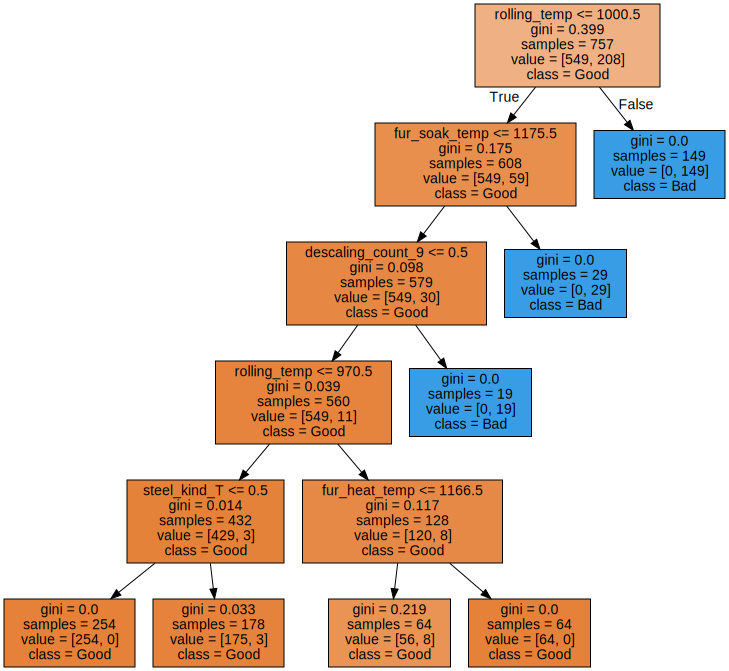

In [39]:
final_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=20,
                       random_state=2024).fit(tr_x,tr_y)

dt_painting = export_graphviz(final_model, feature_names= tr_x.columns , impurity=True , filled = True , class_names=['Good' , 'Bad'])
graphviz.Source(dt_painting)

In [40]:
dt_pred = final_model.predict(te_x)
print(classification_report(te_y,dt_pred))
print('Confusion Matrix : \n {}'.format(confusion_matrix(te_y,dt_pred)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       135
           1       1.00      0.91      0.95        55

    accuracy                           0.97       190
   macro avg       0.98      0.95      0.97       190
weighted avg       0.97      0.97      0.97       190

Confusion Matrix : 
 [[135   0]
 [  5  50]]


자료조사 필요. 

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit()

         Current function value: 0.178816
         Iterations: 35


LinAlgError: Singular matrix